In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
sm = pd.read_csv("/content/Student_Marks.csv")

In [4]:
sm.isnull

<bound method DataFrame.isnull of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [27]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [6]:
#removing the rows having null values
sm=sm.dropna()

In [8]:
X= sm.iloc[:,:-1] #independent features
y = sm.iloc[:,-1] # dependent feature

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [10]:
X.head()

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811


In [11]:
#printing the correlated value of x and y for finding model feature
print(model.feature_importances_)

[0.06469217 0.93530783]


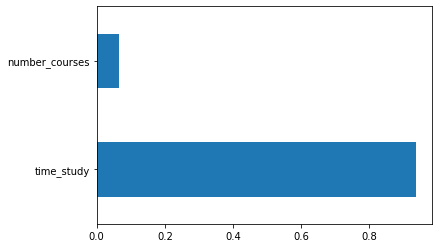

In [12]:
#finding the levels of each column
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [13]:
#train and test the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#importing linearregression
from sklearn.linear_model import LinearRegression
#fitting the training dataset in linearregression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
regressor.coef_

array([1.8026446 , 5.30599863])

In [16]:
regressor.intercept_

-6.481888794697404

In [17]:
#using lambda function finding the training dataset coefficient value
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9378771069749018


In [18]:
#returns score of test dataset
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [19]:
score.mean()

0.9325393590266863

In [21]:
#coefficient of each attributes
coeff_sm = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_sm

,Coefficient
number_courses,1.802645
time_study,5.305999


In [22]:
prediction=regressor.predict(X_test)

In [23]:
#importing the metrics
from sklearn import metrics

In [24]:
#finding the error between actual value vs predicted value
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.738552278141334
MSE: 10.2550695861267
RMSE: 3.202353757180287


In [25]:
#loading pickle to create an empty file
import pickle 

In [26]:
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)
